# HDB Resale Flat Prices

With more than 1 million flats spread across 24 towns and 3 estates, the Singapore brand of public housing is uniquely different. The flats spell home for over 80% of Singapore's resident population, of which, about 90% own their home.

Data.gov is a repository of many datasets that are made available by different public service bodies in Singapore. In this assignment we will work on [HDB Resale Price](https://data.gov.sg/dataset/resale-flat-prices) available through the same datastore. It houses the resale price data from January 1990 to December 2023 on a monthly basis.

In this assignment, we will focus on the resale records from 2020 to 2023. We want to explore if the distance from the MRT station has any impact on the resale price.

## Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

## Question 1: Data Preprocessing

We want to work with a subset of the available dataset. Please perform the following operations to choose and preprocess the desired subset.

- Create a new column, named `year`, that isolates year of purchase from the date of resale.
- Select the data from year **2019 to 2022**. *(We will only use this subset for the entire assignment. 2023 does not have sufficient data.)*
- Drop the records with EXECUTIVE and MULTI-GENERATION `flat_type`s.
- Drop the records in the CENTRAL AREA and BUKIT TIMAH `town`.
- Create a new column, named `price_per_sqm`, that computes the resale price of the flat per square meter of the area.
- Drop the following columns: `storey_range`, `flat_model`, `resale_price`, `floor_area_sqm`.

Note: Further questions work on this preprocessed dataset.

<div align="right"> (3 points) </div>

In [2]:
data['year']=data.month.str[:4]
data1=data[(data.year>='2019')&(data.year<='2022')]
data1=data1[(data1['flat_type']!='EXECUTIVE')&(data1['flat_type']!='MULTI-GENERATION')]
data1=data1[(data1['town']!='CENTRAL AREA')&(data1['town']!='BUKIT TIMAH')]
data1['price_per_sqm']=data1.resale_price/data1.floor_area_sqm
data=data1.drop(columns=['storey_range','flat_model','resale_price','floor_area_sqm'])
data

,month,town,flat_type,block,street_name,lease_commence_date,remaining_lease,year,price_per_sqm
42070,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58 years,2019,3432.835821
42071,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66 years,2019,3916.666667
42072,2019-01,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,1979,59 years,2019,3552.238806
42073,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66 years 01 month,2019,3934.426230
42074,2019-01,ANG MO KIO,3 ROOM,637,ANG MO KIO AVE 6,1980,60 years 08 months,2019,3529.411765
...,...,...,...,...,...,...,...,...,...
143403,2022-12,YISHUN,5 ROOM,221,YISHUN ST 21,1985,61 years 07 months,2022,4545.454545
143404,2022-12,YISHUN,5 ROOM,505D,YISHUN ST 51,2016,92 years 05 months,2022,5929.203540
143405,2022-12,YISHUN,5 ROOM,603,YISHUN ST 61,1987,63 years 04 months,2022,4603.305785
143406,2022-12,YISHUN,5 ROOM,755,YISHUN ST 72,1986,63 years,2022,4754.098361


We observe that the `remaining_lease` feature has multiple missing values. We can impute the missing values and ensure that the dataframe does not contain any missing value.

*What is the lease period of every HDB flat in Singapore? [ Find out here.](https://www.gov.sg/article/do-i-really-own-my-hdb-flat)*

In [3]:
data['lease_commence_date'] = data['lease_commence_date'].astype(int)
data['year'] = data['year'].astype(int)
data['remaining_lease'] = (99 + data['lease_commence_date']) - data['year']
data

,month,town,flat_type,block,street_name,lease_commence_date,remaining_lease,year,price_per_sqm
42070,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,3432.835821
42071,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3916.666667
42072,2019-01,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,1979,59,2019,3552.238806
42073,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3934.426230
42074,2019-01,ANG MO KIO,3 ROOM,637,ANG MO KIO AVE 6,1980,60,2019,3529.411765
...,...,...,...,...,...,...,...,...,...
143403,2022-12,YISHUN,5 ROOM,221,YISHUN ST 21,1985,62,2022,4545.454545
143404,2022-12,YISHUN,5 ROOM,505D,YISHUN ST 51,2016,93,2022,5929.203540
143405,2022-12,YISHUN,5 ROOM,603,YISHUN ST 61,1987,64,2022,4603.305785
143406,2022-12,YISHUN,5 ROOM,755,YISHUN ST 72,1986,63,2022,4754.098361


## Question 2: Data Augmentation

Since we are interested in the distance from the MRT station, we need the geolocations of the HDBs as well as MRT stations.

A quick search on Google gives us [this](https://www.kaggle.com/datasets/mylee2009/singapore-postal-code-mapper) publicly available dataset on Kaggle. We have downloaded this dataset and pre-processed it for you. *(To get a taste of preprocessing, you can try downloading it and cleaning it. You will realise that it is not a obvious task to even understand why cleaning is needed at the outset. You will have to really dive deeper to understand it.)*

- Load this dataset in a dataframe `hdb_locations`.
- Create a new dataframe, named `imputed_dataset`, by merging `hdb_locations` dataset with our `resale_dataset`. (Validate that the `imputed_dataset` has as many records as the `resale_dataset`.)
- Drop all records with NaN values in the `imputed_dataset`. They are manifested due to incomplete `hdb_locations` dataset. We are okay to sacrifice a few records.

<div align="right"> (3 points) </div>

In [4]:
hdb_locations = pd.read_csv("sg_zipcode_mapper_utf.csv")
hdb_locations=hdb_locations.drop_duplicates(subset=['block','street_name'])
imputed_dataset=pd.merge(data,hdb_locations,on=['block','street_name'],how='left',validate='many_to_one')
imputed_dataset.dropna()

,month,town,flat_type,block,street_name,lease_commence_date,remaining_lease,year,price_per_sqm,Unnamed: 0,postal,lat,lng,searchval,building,address,postal.1
0,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,3432.835821,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225
1,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,4029.850746,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225
2,2019-02,ANG MO KIO,4 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,4510.869565,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225
3,2019-04,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,4104.477612,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225
4,2019-11,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,3805.970149,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63549,2022-12,WOODLANDS,4 ROOM,693C,WOODLANDS AVE 6,2018,95,2022,6576.086957,4195,733693,1.438100,103.804430,ADMIRALTY GROVE,ADMIRALTY GROVE,693C WOODLANDS AVE 6 ADMIRALTY GROVE SINGAPORE...,733693
63550,2022-12,YISHUN,3 ROOM,673B,YISHUN AVE 4,2018,95,2022,6630.705882,8238,762673,1.420611,103.842184,FERN GROVE @ YISHUN,FERN GROVE @ YISHUN,673B YISHUN AVE 4 FERN GROVE @ YISHUN SINGAPOR...,762673
63551,2022-12,YISHUN,4 ROOM,676B,YISHUN RING RD,2018,95,2022,5860.215054,18173,762676,1.421539,103.843054,PARK GROVE @ YISHUN,PARK GROVE @ YISHUN,676B YISHUN RING RD PARK GROVE @ YISHUN SINGAP...,762676
63552,2022-12,YISHUN,4 ROOM,676B,YISHUN RING RD,2018,95,2022,5806.451613,18173,762676,1.421539,103.843054,PARK GROVE @ YISHUN,PARK GROVE @ YISHUN,676B YISHUN RING RD PARK GROVE @ YISHUN SINGAP...,762676


## Question 3: Finding the Nearest MRT station

We need geolocations of the MRT stations to locate the nearest station to the HDB. A quick search on Google gives us [this](https://www.kaggle.com/datasets/yxlee245/singapore-train-station-coordinates) publicly available dataset on Kaggle. We have downloaded the dataset for you. We have dropped the stations on LRT.

In [5]:
mrt_locations = pd.read_csv("mrt_data.csv")
mrt_locations.drop(columns=['type'], inplace=True)

Using Euclidean distance between two geolocation offers us a false notion of the distance. Euclidean distance is meant for the flat space; which Earth isn't (thanks to Greek geographer Eratosthenes!).

We have provided you the following function to compute the distance between to geolocations.

In [6]:
from math import sin, cos, sqrt, atan2, radians

def earth_distance(x, y):

  # Approximate radius of earth in km
  R = 6373.0

  lat1, lng1 = radians(x[0]), radians(x[1])
  lat2, lng2 = radians(y[0]), radians(y[1])

  dlon = lng2 - lng1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  return R * c

def euclidean_distance(x, y):
  dx = x[0] - y[0]
  dy = x[1] - y[1]

  return sqrt(dx**2 + dy**2)

jurong_east = [1.333207, 103.742308]
near_amk = [1.365445, 103.842715]
print("Euclidean distance: ", euclidean_distance(jurong_east, near_amk))
print("Realistic distance: ", earth_distance(jurong_east, near_amk))

Euclidean distance:  0.10545546118149039
Realistic distance:  11.726844638513933


Create two columns in the `imputed_dataset` dataframe.
- Column `nearest_mrt` that lists the name of the MRT station nearest to the resale record.
- Column `mrt_dist` that lists the distance from the nearest MRT station.

**Hint.** *Use [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to efficiently do this task.*

<div align="right"> (3 points) </div>

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) 
x = mrt_locations[['lat', 'lng']]
y = mrt_locations['station_name']
knn.fit(x,y)
apartment_locations = imputed_dataset[['lat', 'lng']]
nearest_stations = knn.predict(apartment_locations)
imputed_dataset['nearest_station'] = nearest_stations

In [8]:
dist=[]
for index, row in imputed_dataset.iterrows():
    apartment_location = (row['lat'], row['lng'])
    station_locations = mrt_locations[mrt_locations['station_name'] == row['nearest_station']][['lat', 'lng']].values[0]
    distence = earth_distance(apartment_location, station_locations)
    dist.append(distence)
imputed_dataset['mrt_dist'] = dist

In [9]:
imputed_dataset

,month,town,flat_type,block,street_name,lease_commence_date,remaining_lease,year,price_per_sqm,Unnamed: 0,postal,lat,lng,searchval,building,address,postal.1,nearest_station,mrt_dist
0,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,3432.835821,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225,Ang Mo Kio,1.305063
1,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,4029.850746,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225,Ang Mo Kio,1.305063
2,2019-02,ANG MO KIO,4 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,4510.869565,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225,Ang Mo Kio,1.305063
3,2019-04,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,4104.477612,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225,Ang Mo Kio,1.305063
4,2019-11,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,3805.970149,9369,560225,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225,Ang Mo Kio,1.305063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63549,2022-12,WOODLANDS,4 ROOM,693C,WOODLANDS AVE 6,2018,95,2022,6576.086957,4195,733693,1.438100,103.804430,ADMIRALTY GROVE,ADMIRALTY GROVE,693C WOODLANDS AVE 6 ADMIRALTY GROVE SINGAPORE...,733693,Woodlands,2.008001
63550,2022-12,YISHUN,3 ROOM,673B,YISHUN AVE 4,2018,95,2022,6630.705882,8238,762673,1.420611,103.842184,FERN GROVE @ YISHUN,FERN GROVE @ YISHUN,673B YISHUN AVE 4 FERN GROVE @ YISHUN SINGAPOR...,762673,Khatib,1.081542
63551,2022-12,YISHUN,4 ROOM,676B,YISHUN RING RD,2018,95,2022,5860.215054,18173,762676,1.421539,103.843054,PARK GROVE @ YISHUN,PARK GROVE @ YISHUN,676B YISHUN RING RD PARK GROVE @ YISHUN SINGAP...,762676,Khatib,1.208549
63552,2022-12,YISHUN,4 ROOM,676B,YISHUN RING RD,2018,95,2022,5806.451613,18173,762676,1.421539,103.843054,PARK GROVE @ YISHUN,PARK GROVE @ YISHUN,676B YISHUN RING RD PARK GROVE @ YISHUN SINGAP...,762676,Khatib,1.208549


## Question 4: Data Visualisation

The resale price of the HDB equally depends on the remaining lease. People tend to buy newer HDBs than the ones that would soon go for re-development.

Write a script that shows a scatter-plot of `price_per_sqm` against `remaining_lease`. Do you observe a positive correlation?

<div align="right"> (1 point) </div>

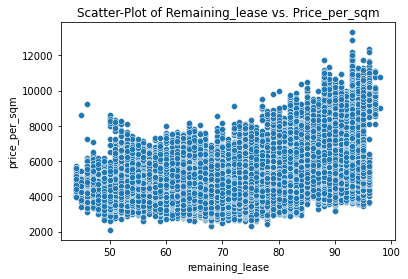

In [10]:
imputed_dataset.plot(x = 'remaining_lease', y = 'price_per_sqm', kind = 'scatter')
sns.scatterplot(data=imputed_dataset, x = 'remaining_lease', y = 'price_per_sqm')
plt.title('Scatter-Plot of Remaining_lease vs. Price_per_sqm')
plt.xlabel('remaining_lease')
plt.ylabel('price_per_sqm')
plt.show()

We also want to see the variation of resale price across different towns.

Write a script that shows the boxplot of `price_per_sqm` against varius `town`s. All towns should be listed in alphabetical order on the x-axis.

<div align="right"> (1 point) </div>

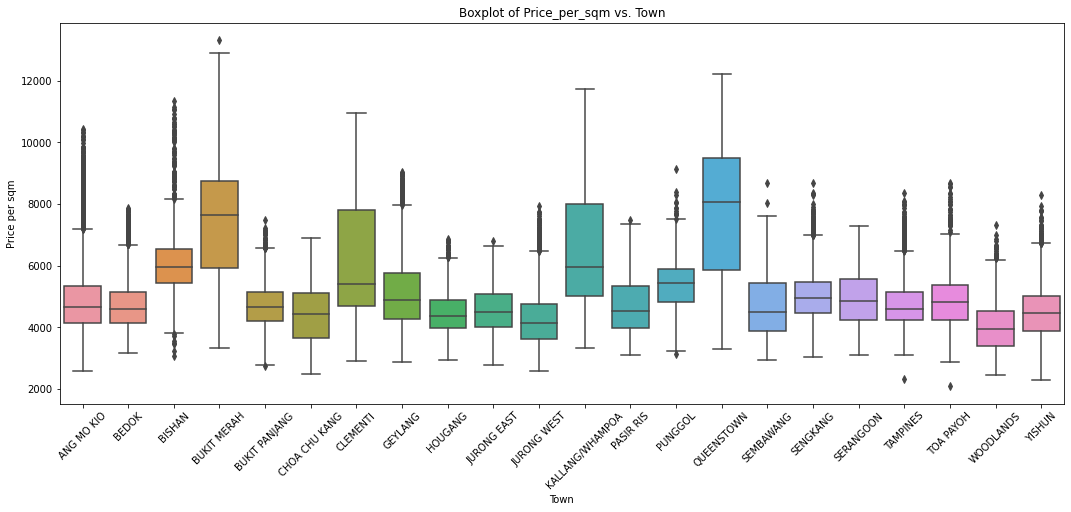

In [11]:
town_s = sorted(imputed_dataset['town'].unique())
plt.figure(figsize=(18, 7))
sns.boxplot(data=imputed_dataset, x='town', y='price_per_sqm', order=town_s)
plt.title('Boxplot of Price_per_sqm vs. Town')
plt.xlabel('Town')
plt.ylabel('Price per sqm')
plt.xticks(rotation=45)
plt.show()

We want to observe the number of different `flat_type` that are sold over the last four years.

Write a script that would generate a plot that looks as follows.

<div align="right"> (2 points) </div>

<img src="https://www.comp.nus.edu.sg/~ashishd/IT5006/Assignments/Assignment_1/flat_type.png" alt="flat_type" width="500"/>

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


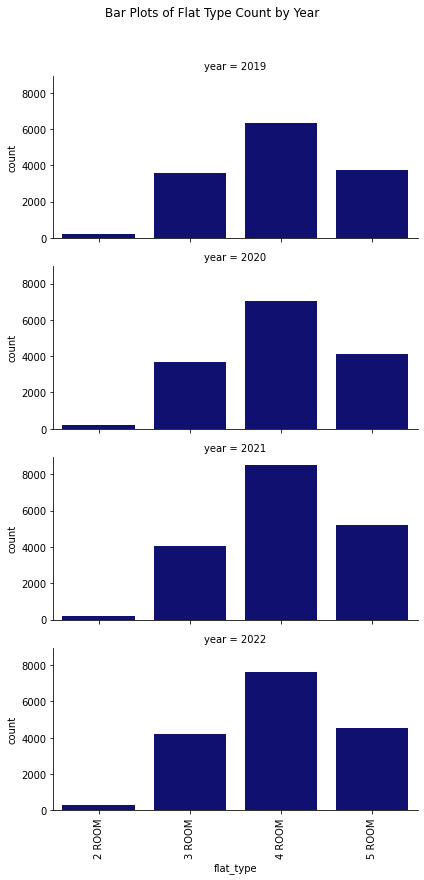

In [12]:
f1 = sns.FacetGrid(imputed_dataset, col="year", col_wrap=1, height=3, aspect=2)
f1.map(sns.countplot, "flat_type", order=['2 ROOM','3 ROOM','4 ROOM','5 ROOM'], color="navy")
f1.set_titles("year = {col_name}")
plt.subplots_adjust(top=0.9)
f1.fig.suptitle('Bar Plots of Flat Type Count by Year')
yticks = range(0, 8001, 2000)
f1.set(yticks=yticks)
for ax in f1.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

We want to observe the correlation between the resale price and the distance from the nearest MRT station.

Write a script that would generate a plot that looks as follows.

<div align="right"> (2 points) </div>

<img src="https://www.comp.nus.edu.sg/~ashishd/IT5006/Assignments/Assignment_1/price_mrt.png" alt="flat_type" width="800"/>

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


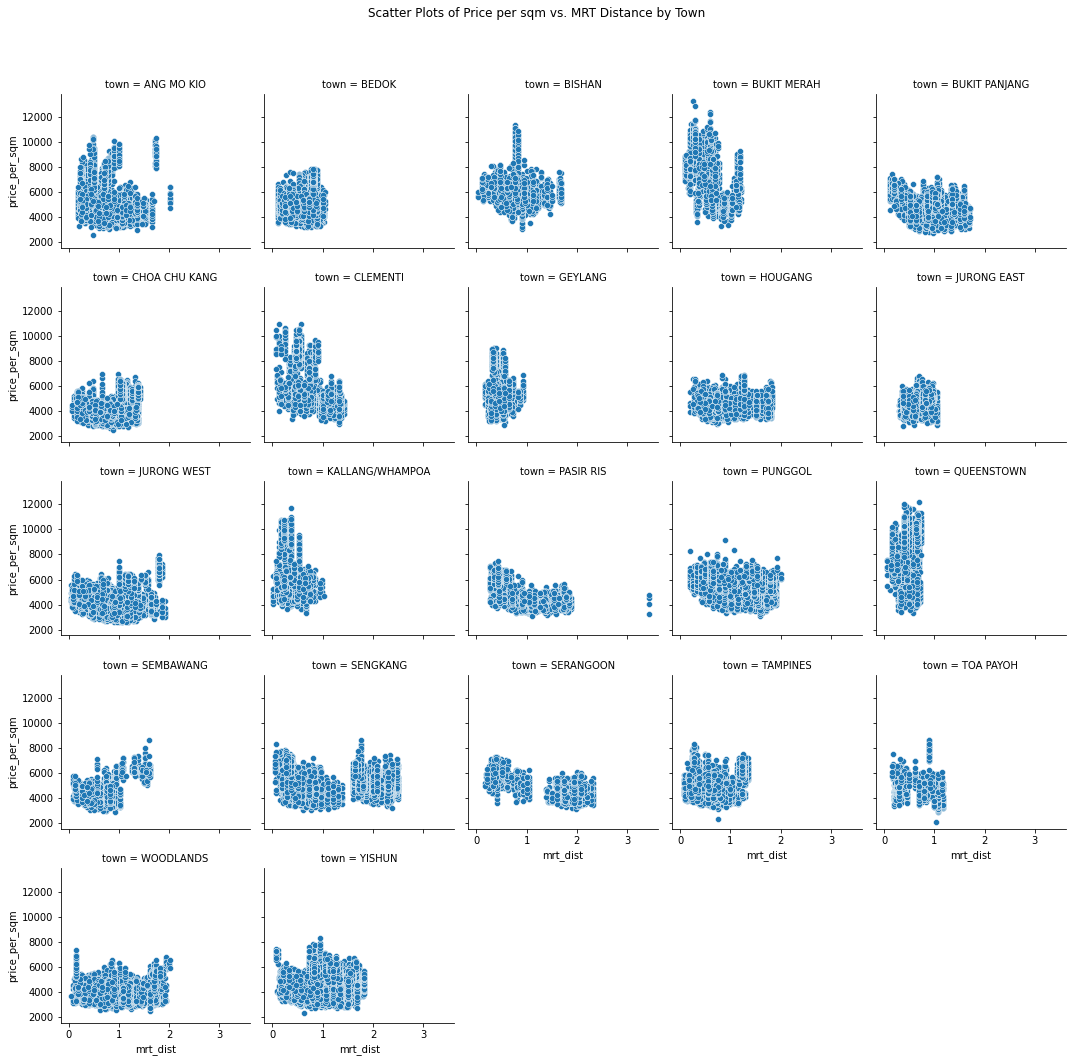

In [13]:
f2 = sns.FacetGrid(imputed_dataset, col="town", col_wrap=5, height=3)
f2.map(sns.scatterplot, "mrt_dist", "price_per_sqm")
f2.set_titles("town = {col_name}")
plt.subplots_adjust(top=0.9)
f2.fig.suptitle('Scatter Plots of Price per sqm vs. MRT Distance by Town')
plt.show()

## Question 5: Analysis

Which town shows the highest variability in the `price_per_sqm` in the last four years?

<div align="right"> (1 point) </div>

In [14]:
price_range = imputed_dataset.groupby('town')['price_per_sqm'].agg(lambda x: x.max() - x.min()).reset_index()
highest_town = price_range.loc[price_range['price_per_sqm'].idxmax()]
print(" '{}' shows the highest variability in the 'price_per_sqm' in the last 4 years，the difference is {:.2f}".format(highest_town['town'], highest_town['price_per_sqm']))

 'BUKIT MERAH' shows the highest variability in the 'price_per_sqm' in the last 4 years，the difference is 9977.01


**Answer: I use coding to assist in observing the above 'Boxplot of Price_per_sqm vs. Town' and believe that *BUKIT MERAH* has the greatest change.**

Which observation do you make looking at the resale records as per the `flat_type` over the years? What is a probable reason for the pattern that you observe?

<div align="right">(2 points)</div>

In [15]:
tab=pd.crosstab(imputed_dataset.year,imputed_dataset.flat_type)
tab

flat_type,2 ROOM,3 ROOM,4 ROOM,5 ROOM
year,,,,
2019,203,3588,6307,3752
2020,219,3665,7024,4129
2021,208,4063,8521,5193
2022,276,4197,7643,4566


- *Observation(s):* Based on the above table and figures, I observed that the resale proportions of different types of housing have remained roughly the same over the past four years, with 4 ROOM being the highest and 2 ROOM being the lowest, while 3 ROOM and 5 ROOM are similar in quantity, with 5 ROOM being slightly more. The resale quantity of 2 ROOM housing has remained relatively stable over the past four years, while the resale quantity of 3 ROOM has been gradually increasing at a slow pace each year. The resale quantity of 4 ROOM saw significant growth from 2019 to 2021 but decreased in 2022. Similarly, the resale quantity of 5 ROOM also experienced some growth from 2019 to 2021, with a slight decrease in 2022.


- *Probable reason(s):* The consistent resale proportions might indicate that the demand for different types of housing has remained relatively stable, with 4 ROOM being the most preferred and 2 ROOM being less popular. This could reflect the preferences of homebuyers in Singapore.The homebuying demographic is likely dominated by families consisting of couples with 1-2 children or elderly individuals. The resale market is also influenced by the supply and availability of different housing types. If there is a consistent supply of 4 ROOM units, for example, it may contribute to their higher resale proportions.External events, such as the COVID-19 pandemic, can have short-term impacts on the housing market. Since 2022, the global economy has shown a downward trend.The increase in 4 ROOM resale quantity from 2019 to 2021 and the subsequent decrease in 2022 could be related to the pandemic's effects.


We can observe that for many towns (such as Clementi, Bukit Merah, Pasir Ris, etc.) the `price_per_sqm` has a -ve correlation to the `mrt_dist`. This fits our hypothesis.

But some towns tend to show counter-intuitive behaviour. Please provide possible reasons behind these observation. You may support your answers by further analysing the available data.

- We observe a strong positive correlation for Sembawang (which means the houses closer to MRT are cheaper than the ones that are farther!). What is a probable reason?

- We observe two distinct clusters in the plot of Sengkang and Serangoon. What is a probable reason?
<div align="right">(2 points)</div>

**Answer:**
- *Probable reason for Obs 1:* By using Google Maps, it can be observed that Sembawang's location in Singapore falls under the suburban category. Therefore, houses farther from Sembawang might be closer to shopping malls or natural parks, potentially indicating a tendency towards higher-priced areas. Additionally, the MRT station closest to Sembawang is Yishun. By examining the 'Boxplot of Price_per_sqm vs. Town' chart, it can be seen that prices in Yishun are slightly higher than in Sembawang, which supports the aforementioned conclusion.


- *Probable reason for Obs 2:* For Sengkang and Serangoon, these two areas are not very far from the city center themselves and are surrounded by many amenities. Therefore, houses closer to the MRT stations tend to have higher prices. Additionally, for Sengkang, houses farther from the MRT stations may be closer to the airport, which could result in higher prices. For Serangoon, houses farther from the MRT stations may be closer to the city center, leading to higher prices as well.